In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

In [13]:
dates = pd.date_range('20170228',periods=6)
dates

DatetimeIndex(['2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
               '2017-03-04', '2017-03-05'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=tuple('ABCD'))
df

,A,B,C,D
2017-02-28,-0.719562,0.663551,-0.188758,0.504393
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216
2017-03-03,-1.740692,0.968783,1.482075,-0.243930
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118


### 我们也可以用dict来创建DataFrame对象，而且它会自动用Numpy的广播

In [22]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'C':pd.Timestamp('20171026'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(['test','train','test','train']),
                   'F':'foo'})
df2

,A,B,C,D,E,F
0,1,1,2017-10-26,3,test,foo
1,1,1,2017-10-26,3,train,foo
2,1,1,2017-10-26,3,test,foo
3,1,1,2017-10-26,3,train,foo


In [23]:
df2.dtypes

A           float64
B           float32
C    datetime64[ns]
D             int32
E          category
F            object
dtype: object

In [25]:
df2.C

0   2017-10-26
1   2017-10-26
2   2017-10-26
3   2017-10-26
Name: C, dtype: datetime64[ns]

实际上，所有的列都可以通过标签名来访问，如"A""B""C""D""E"等
相较于Numpy的二维数组a[:3],df.D的表意能力更强，无需计算所需要的数据是第几列

## 查看数据
frame 的头部和尾部

In [26]:
df.head()

,A,B,C,D
2017-02-28,-0.719562,0.663551,-0.188758,0.504393
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216
2017-03-03,-1.740692,0.968783,1.482075,-0.243930
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238


In [27]:
df.tail(3)

,A,B,C,D
2017-03-03,-1.740692,0.968783,1.482075,-0.243930
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118


也可以看索引，列名以及低层numpy的数据的类型

In [28]:
df.index

DatetimeIndex(['2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
               '2017-03-04', '2017-03-05'],
              dtype='datetime64[ns]', freq='D')

In [29]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [30]:
df.values

array([[-0.71956244,  0.66355114, -0.18875787,  0.50439316],
       [-2.81432077, -2.31679474, -2.47438396, -1.04087871],
       [-0.44895594, -0.79277205, -0.69981875, -0.50721596],
       [-1.74069244,  0.96878257,  1.48207549, -0.24393004],
       [-0.81519185, -0.90207246, -0.20813673,  0.40423836],
       [-0.16297623, -0.39623616, -1.97582804,  0.99711825]])

可以通过describe（）方法快速地查看数据的概括统计

In [31]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-1.116950,-0.462590,-0.677475,0.018954
std,0.987459,1.188416,1.416890,0.749681
min,-2.814321,-2.316795,-2.474384,-1.040879
25%,-1.509317,-0.874747,-1.656826,-0.441394
50%,-0.767377,-0.594504,-0.453978,0.080154
75%,-0.516608,0.398604,-0.193603,0.479354
max,-0.162976,0.968783,1.482075,0.997118


In [36]:
df.T

,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00,2017-03-05 00:00:00
A,-0.719562,-2.814321,-0.448956,-1.740692,-0.815192,-0.162976
B,0.663551,-2.316795,-0.792772,0.968783,-0.902072,-0.396236
C,-0.188758,-2.474384,-0.699819,1.482075,-0.208137,-1.975828
D,0.504393,-1.040879,-0.507216,-0.243930,0.404238,0.997118


- 对数据进行排序，分别按照轴和值来排序

In [41]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238
2017-03-03,-1.740692,0.968783,1.482075,-0.243930
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879
2017-02-28,-0.719562,0.663551,-0.188758,0.504393


In [42]:
df.sort_values(by='B')

,A,B,C,D
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118
2017-02-28,-0.719562,0.663551,-0.188758,0.504393
2017-03-03,-1.740692,0.968783,1.482075,-0.243930


## 选择数据
- 用于选择/设置数据标准Python和Numpy表达式很直观，而且对于交互式工作非常方便,但是对于生产代码，推荐使用优化的pandas数据访问方法，如：.at,.iat,.loc,.iloc,.ix
<img src="image/1.png">

### 访问数据（Getting）
选择某一列，返回Series对象，等价于df.A:

In [43]:
df.describe().loc['mean']

A   -1.116950
B   -0.462590
C   -0.677475
D    0.018954
Name: mean, dtype: float64

In [44]:
df.A

2017-02-28   -0.719562
2017-03-01   -2.814321
2017-03-02   -0.448956
2017-03-03   -1.740692
2017-03-04   -0.815192
2017-03-05   -0.162976
Freq: D, Name: A, dtype: float64

In [45]:
df[0:3]

,A,B,C,D
2017-02-28,-0.719562,0.663551,-0.188758,0.504393
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216


这种方法和np的二维数组没什么差别，但在pd中可以直接引用索引值，更为直观

In [48]:
df['20170228':'20170301']

,A,B,C,D
2017-02-28,-0.719562,0.663551,-0.188758,0.504393
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879


### 使用标签选择数据
loc 方法使用索引或者列标签选择数据

In [49]:
df.loc[dates[0]]

A   -0.719562
B    0.663551
C   -0.188758
D    0.504393
Name: 2017-02-28 00:00:00, dtype: float64

In [51]:
df.loc[:,['C','B']]

,C,B
2017-02-28,-0.188758,0.663551
2017-03-01,-2.474384,-2.316795
2017-03-02,-0.699819,-0.792772
2017-03-03,1.482075,0.968783
2017-03-04,-0.208137,-0.902072
2017-03-05,-1.975828,-0.396236


In [53]:
df.loc['20170228':'20170302','A':'B']

,A,B
2017-02-28,-0.719562,0.663551
2017-03-01,-2.814321,-2.316795
2017-03-02,-0.448956,-0.792772


In [59]:
df.at[dates[1],'A']  # 获取特定位置的数据

-2.8143207733436197

### 利用位置来选择
iloc使用位置来选择数据，类似np

In [60]:
df.iloc[3]

A   -1.740692
B    0.968783
C    1.482075
D   -0.243930
Name: 2017-03-03 00:00:00, dtype: float64

In [61]:
df.iloc[3:5,0:2]

,A,B
2017-03-03,-1.740692,0.968783
2017-03-04,-0.815192,-0.902072


In [62]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-03-01,-2.814321,-2.474384
2017-03-02,-0.448956,-0.699819
2017-03-04,-0.815192,-0.208137


### 布尔索引

In [66]:
df[df.A>-0.5]

,A,B,C,D
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118


In [68]:
df[df>0]

,A,B,C,D
2017-02-28,NaN,0.663551,NaN,0.504393
2017-03-01,NaN,NaN,NaN,NaN
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,NaN,0.968783,1.482075,NaN
2017-03-04,NaN,NaN,NaN,0.404238
2017-03-05,NaN,NaN,NaN,0.997118


- 使用isin()方法进行过滤，对于非数字性数据很有用

In [71]:
df2 = df.copy()
df2['E'] = ['one','two','three','four','five','six']
df2

,A,B,C,D,E
2017-02-28,-0.719562,0.663551,-0.188758,0.504393,one
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879,two
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216,three
2017-03-03,-1.740692,0.968783,1.482075,-0.243930,four
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238,five
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118,six


In [72]:
df2['E'].isin(['two','four'])

2017-02-28    False
2017-03-01     True
2017-03-02    False
2017-03-03     True
2017-03-04    False
2017-03-05    False
Freq: D, Name: E, dtype: bool

In [73]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879,two
2017-03-03,-1.740692,0.968783,1.482075,-0.243930,four


### 赋值（setting）

In [76]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20170227',periods=6))   # 数据对齐
s1

2017-02-27    1
2017-02-28    2
2017-03-01    3
2017-03-02    4
2017-03-03    5
2017-03-04    6
Freq: D, dtype: int64

In [77]:
df['F']=s1   # 数据会自动对齐
df

,A,B,C,D,E,F
2017-02-28,-0.719562,0.663551,-0.188758,0.504393,one,2
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879,two,3
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216,three,4
2017-03-03,-1.740692,0.968783,1.482075,-0.243930,four,5
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238,five,6
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118,six,NaN


In [78]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,E,F
2017-02-28,0.000000,0.663551,-0.188758,0.504393,one,2
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879,two,3
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216,three,4
2017-03-03,-1.740692,0.968783,1.482075,-0.243930,four,5
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238,five,6
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118,six,NaN


,A,B,C,D,E,F
2017-02-28,0.000000,0.663551,-0.188758,0.504393,one,2
2017-03-01,-2.814321,-2.316795,-2.474384,-1.040879,two,3
2017-03-02,-0.448956,-0.792772,-0.699819,-0.507216,three,4
2017-03-03,-1.740692,0.968783,1.482075,-0.243930,four,5
2017-03-04,-0.815192,-0.902072,-0.208137,0.404238,five,6
2017-03-05,-0.162976,-0.396236,-1.975828,0.997118,six,NaN


In [82]:
df.loc[:,'D'] = np.array([5]*len(df))
df

,A,B,C,D,E,F
2017-02-28,0.000000,0.663551,-0.188758,5,one,2
2017-03-01,-2.814321,-2.316795,-2.474384,5,two,3
2017-03-02,-0.448956,-0.792772,-0.699819,5,three,4
2017-03-03,-1.740692,0.968783,1.482075,5,four,5
2017-03-04,-0.815192,-0.902072,-0.208137,5,five,6
2017-03-05,-0.162976,-0.396236,-1.975828,5,six,NaN


### 缺失值
- pd一般使用np.nan表示缺失值，默认情况下，不会参与计算。重建索引可以修改，增加删除索引**而且会返回一份拷贝后的数据**

In [84]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1

,A,B,C,D,E,F,E
2017-02-28,0.000000,0.663551,-0.188758,5,1,2,1
2017-03-01,-2.814321,-2.316795,-2.474384,5,1,3,1
2017-03-02,-0.448956,-0.792772,-0.699819,5,three,4,three
2017-03-03,-1.740692,0.968783,1.482075,5,four,5,four


In [85]:
df

,A,B,C,D,E,F
2017-02-28,0.000000,0.663551,-0.188758,5,one,2
2017-03-01,-2.814321,-2.316795,-2.474384,5,two,3
2017-03-02,-0.448956,-0.792772,-0.699819,5,three,4
2017-03-03,-1.740692,0.968783,1.482075,5,four,5
2017-03-04,-0.815192,-0.902072,-0.208137,5,five,6
2017-03-05,-0.162976,-0.396236,-1.975828,5,six,NaN


##### 删除缺失值所有行

In [86]:
df1.dropna(how='any')

,A,B,C,D,E,F,E
2017-02-28,0.000000,0.663551,-0.188758,5,1,2,1
2017-03-01,-2.814321,-2.316795,-2.474384,5,1,3,1
2017-03-02,-0.448956,-0.792772,-0.699819,5,three,4,three
2017-03-03,-1.740692,0.968783,1.482075,5,four,5,four


In [89]:
df.fillna(value=99999)

,A,B,C,D,E,F
2017-02-28,0.000000,0.663551,-0.188758,5,one,2
2017-03-01,-2.814321,-2.316795,-2.474384,5,two,3
2017-03-02,-0.448956,-0.792772,-0.699819,5,three,4
2017-03-03,-1.740692,0.968783,1.482075,5,four,5
2017-03-04,-0.815192,-0.902072,-0.208137,5,five,6
2017-03-05,-0.162976,-0.396236,-1.975828,5,six,99999


In [90]:
pd.isnull(df)

,A,B,C,D,E,F
2017-02-28,False,False,False,False,False,False
2017-03-01,False,False,False,False,False,False
2017-03-02,False,False,False,False,False,False
2017-03-03,False,False,False,False,False,False
2017-03-04,False,False,False,False,False,False
2017-03-05,False,False,False,False,False,True


## 基本操作

### 统计

In [91]:
df.mean()

A   -0.997023
B   -0.462590
C   -0.677475
D    5.000000
F    4.000000
dtype: float64

In [92]:
df.apply(np.cumsum)

,A,B,C,D,E,F
2017-02-28,0.000000,0.663551,-0.188758,5,one,2
2017-03-01,-2.814321,-1.653244,-2.663142,10,onetwo,5
2017-03-02,-3.263277,-2.446016,-3.362961,15,onetwothree,9
2017-03-03,-5.003969,-1.477233,-1.880885,20,onetwothreefour,14
2017-03-04,-5.819161,-2.379306,-2.089022,25,onetwothreefourfive,20
2017-03-05,-5.982137,-2.775542,-4.064850,30,onetwothreefourfivesix,NaN


- 计数

In [95]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    0
1    4
2    0
3    6
4    3
5    2
6    3
7    6
8    0
9    5
dtype: int32

In [96]:
s.value_counts()

0    3
6    2
3    2
5    1
4    1
2    1
dtype: int64

## Merge合并

### 连接concat
- pandas 为了方便将Series，DataFrame组合在一起，开发了各种功能，使用concat方法

In [97]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.313986,-1.752689,-0.727128,0.944659
1,-0.880104,-0.815136,2.137981,-0.891611
2,-0.716841,0.558852,0.237161,1.038447
3,2.333176,0.089802,-1.125257,-0.434935
4,-0.385134,-0.964884,1.043386,-0.882414
5,-1.024255,0.464125,-0.123116,-0.491728
6,-0.135859,0.795485,0.812539,0.911822
7,0.407474,-0.373798,0.699657,2.164834
8,-0.258135,0.454692,-0.033139,-1.568821
9,0.243831,-0.520384,1.198505,0.272807


In [99]:
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -1.313986 -1.752689 -0.727128  0.944659
 1 -0.880104 -0.815136  2.137981 -0.891611
 2 -0.716841  0.558852  0.237161  1.038447,
           0         1         2         3
 3  2.333176  0.089802 -1.125257 -0.434935
 4 -0.385134 -0.964884  1.043386 -0.882414
 5 -1.024255  0.464125 -0.123116 -0.491728
 6 -0.135859  0.795485  0.812539  0.911822,
           0         1         2         3
 7  0.407474 -0.373798  0.699657  2.164834
 8 -0.258135  0.454692 -0.033139 -1.568821
 9  0.243831 -0.520384  1.198505  0.272807]

In [100]:
pd.concat(pieces)

,0,1,2,3
0,-1.313986,-1.752689,-0.727128,0.944659
1,-0.880104,-0.815136,2.137981,-0.891611
2,-0.716841,0.558852,0.237161,1.038447
3,2.333176,0.089802,-1.125257,-0.434935
4,-0.385134,-0.964884,1.043386,-0.882414
5,-1.024255,0.464125,-0.123116,-0.491728
6,-0.135859,0.795485,0.812539,0.911822
7,0.407474,-0.373798,0.699657,2.164834
8,-0.258135,0.454692,-0.033139,-1.568821
9,0.243831,-0.520384,1.198505,0.272807


### Join SQL风格的操作

In [106]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left

,key,lval
0,foo,1
1,foo,2


In [107]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [109]:
left1 = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right1 = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
left1

,key,lval
0,foo,1
1,bar,2


In [111]:
pd.merge(left1,right1,on='key')   # 和数据库的连接功能一样

,key,lval,rval
0,foo,1,4
1,bar,2,5


### group

- 根据某些条件将数据切分成数组
- 对每个组独立进行操作
- 将结果组合到一个数据结构中

In [112]:
df = pd.DataFrame({'A':['foo','bar','foo','bar',
                       'foo','bar','foo','bar'],
                  'B':['one','one','two','two',
                       'three','three','one','two'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.683712,0.019959
1,bar,one,0.508658,0.775308
2,foo,two,-0.321024,-0.380562
3,bar,two,1.131311,-0.328905
4,foo,three,0.057084,-1.583105
5,bar,three,0.282929,-0.866067
6,foo,one,-1.588045,-0.993664
7,bar,two,1.020124,-1.386293


In [117]:
df.groupby('A').sum() # 等价于sql中的 select A ,sum(C),sum(D)from df group by A,B

,C,D
A,,
bar,2.943021,-1.805958
foo,-2.535697,-2.937372


In [118]:
df.groupby(tuple('AB')).sum()

C         D
A   B                        
bar one    0.508658  0.775308
    three  0.282929 -0.866067
    two    2.151435 -1.715199
foo one   -2.271757 -0.973704
    three  0.057084 -1.583105
    two   -0.321024 -0.380562

## 数据透视表

In [119]:
np.random.seed(1)
df = pd.DataFrame({'A':['one','one','two','three']*3,
                   'B':['A','B','C']*4,
                   'C':['foo','foo','foo','bar','bar','bar']*2,
                   'D':np.random.randn(12),
                    'E':np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.624345,-0.322417
1,one,B,foo,-0.611756,-0.384054
2,two,C,foo,-0.528172,1.133769
3,three,A,bar,-1.072969,-1.099891
4,one,B,bar,0.865408,-0.172428
5,one,C,bar,-2.301539,-0.877858
6,two,A,foo,1.744812,0.042214
7,three,B,foo,-0.761207,0.582815
8,one,C,foo,0.319039,-1.100619
9,one,A,bar,-0.249370,1.144724


In [120]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.249370  1.624345
      B  0.865408 -0.611756
      C -2.301539  0.319039
three A -1.072969       NaN
      B       NaN -0.761207
      C -2.060141       NaN
two   A       NaN  1.744812
      B  1.462108       NaN
      C       NaN -0.528172

## 绘图

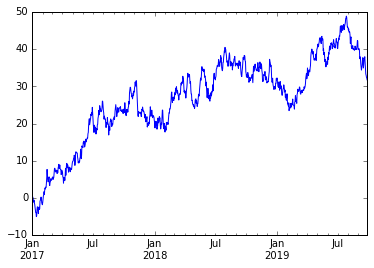

In [121]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2017',periods=1000))
ts = ts.cumsum()
%matplotlib inline
ts.plot()

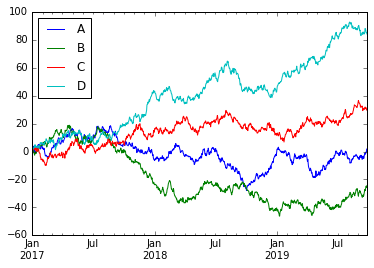

In [122]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index,columns=['A','B','C','D'])
df = df.cumsum()
df.plot()
plt.legend(loc='best')